# Classifying Salaries with Machine Learning Models

### Problem Overview :-

### objective :- 

In [4]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# Loading the dataset
df=pd.read_csv("salaryy.csv")

In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [7]:
# Returns basic statistics on numeric columns
df.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [8]:
df.shape

(32561, 13)

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
df.duplicated().sum()

26

In [11]:
df = df.drop_duplicates() 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32535 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32535 non-null  int64 
 1   workclass       32535 non-null  object
 2   fnlwgt          32535 non-null  int64 
 3   education       32535 non-null  object
 4   education-num   32535 non-null  int64 
 5   marital-status  32535 non-null  object
 6   occupation      32535 non-null  object
 7   relationship    32535 non-null  object
 8   race            32535 non-null  object
 9   sex             32535 non-null  object
 10  hours-per-week  32535 non-null  int64 
 11  native-country  32535 non-null  object
 12  salary          32535 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [14]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [15]:
for i in df:
    print(df[i].value_counts())
    print("*"*80)

age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
********************************************************************************
workclass
Private             22671
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
********************************************************************************
fnlwgt
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
318082     1
138342     1
158040     1
232784     1
257302     1
Name: count, Length: 21648, dtype: int64
********************************************************************************
education
HS-grad         10493
Some-college     7281
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
As

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

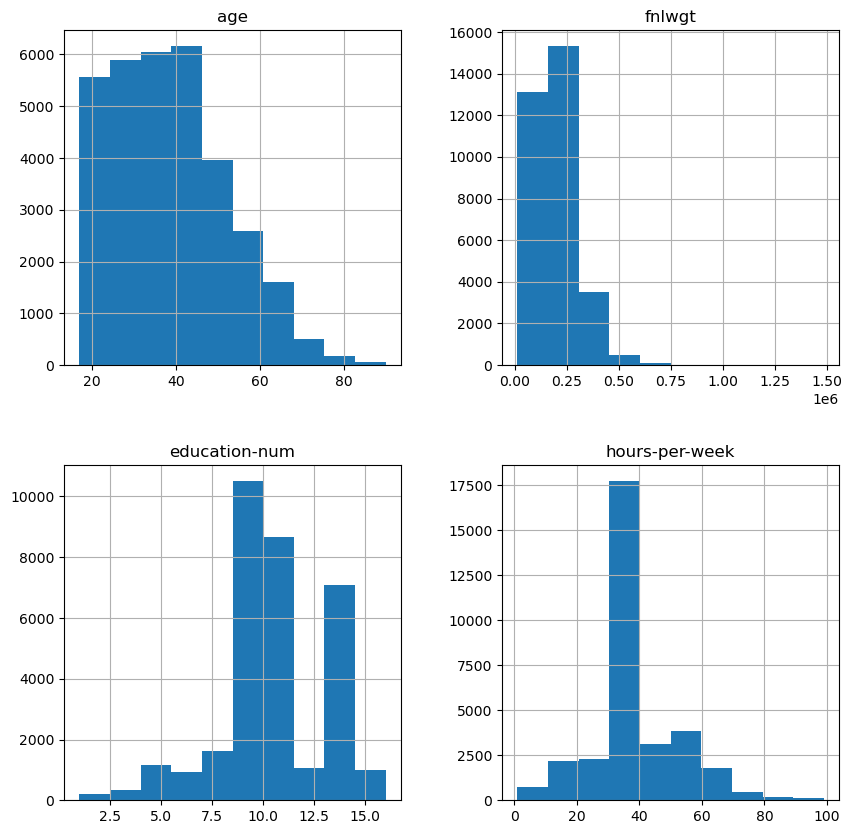

In [16]:
df.hist(figsize=(10,10))

In [17]:
df.replace(" ?", np.nan, inplace=True)

In [18]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [19]:
df["workclass"].fillna("Unknow",inplace=True)
df["occupation"].fillna("Unknow",inplace=True)
df["native-country"].fillna("United-States",inplace=True)

In [20]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [21]:
for i in df:
    print(df[i].value_counts())
    print("*"*80)

age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
********************************************************************************
workclass
 Private             22671
 Self-emp-not-inc     2540
 Local-gov            2093
Unknow                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
********************************************************************************
fnlwgt
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
318082     1
138342     1
158040     1
232784     1
257302     1
Name: count, Length: 21648, dtype: int64
********************************************************************************
education
HS-grad         10493
Some-college     7281
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th           

In [22]:
df.select_dtypes(include="int")

,age,fnlwgt,education-num,hours-per-week
0,39,77516,13,40
1,50,83311,13,13
2,38,215646,9,40
3,53,234721,7,40
4,28,338409,13,40
...,...,...,...,...
32556,27,257302,12,38
32557,40,154374,9,40
32558,58,151910,9,40
32559,22,201490,9,20


In [23]:
df_obj=df.select_dtypes(include="object")
df_obj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [24]:
len(df_obj.columns)

9

In [25]:
l1=df.describe().columns

In [26]:
l1

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week'], dtype='object')

# Visualization Outliers :-

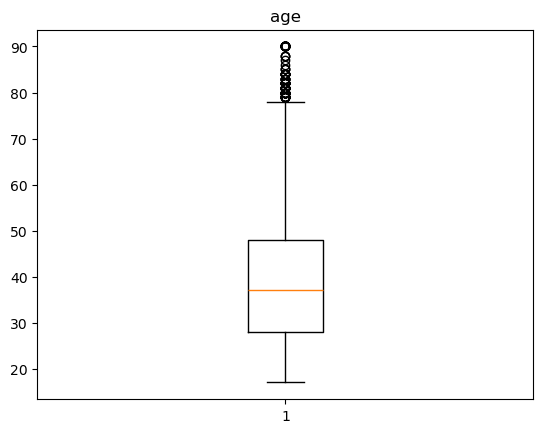

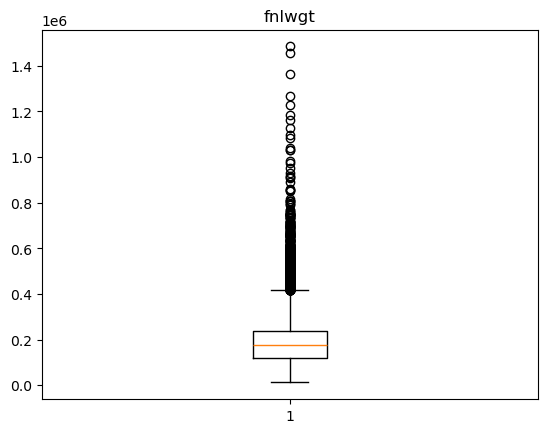

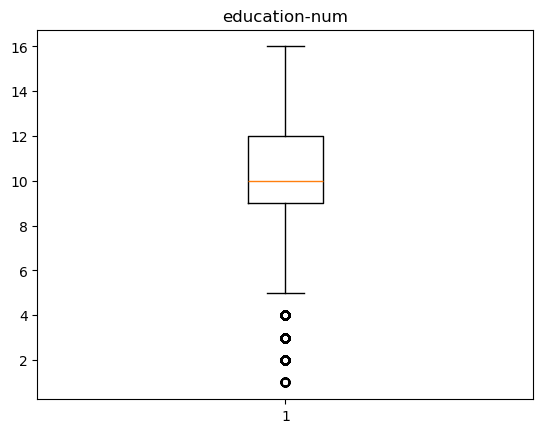

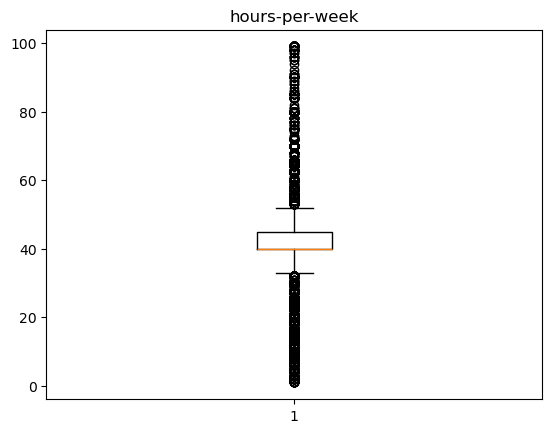

In [28]:
for i in l1:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [29]:
# age

q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 28.0
q3 48.0
iqr 20.0
upper_tail 78.0
lower_tail -2.0


In [30]:
df.loc[df["age"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,40,United-States,<=50K
430,80,Unknow,107762,HS-grad,9,Widowed,Unknow,Not-in-family,White,Male,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,<=50K
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,3,Poland,<=50K
32494,82,Unknow,403910,HS-grad,9,Never-married,Unknow,Not-in-family,White,Male,3,United-States,<=50K


In [31]:
df.loc[df["age"]>ub].value_counts().sum()/len(df)*100

0.43645305056093436

In [32]:
df.loc[df["age"]>ub,"age"]=ub

In [33]:
df.loc[df["age"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


In [34]:
# fnlwgt

q1=df["fnlwgt"].quantile(0.25)
q3=df["fnlwgt"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_tail",lb)

q1 117821.5
q3 236993.5
iqr 119172.0
upper_tail 415751.5
lower_tail -60936.5


In [35]:
df.loc[df["fnlwgt"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,25,United-States,<=50K
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,43,United-States,<=50K
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,30,United-States,<=50K
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,40,United-States,<=50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,2,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32306,24,Private,427686,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,40,Mexico,<=50K
32329,28,Private,435842,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K
32470,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,50,United-States,<=50K
32496,18,Private,436163,11th,7,Never-married,Prof-specialty,Own-child,White,Male,20,United-States,<=50K


In [36]:
df.loc[df["fnlwgt"]>ub,"fnlwgt"]=ub

In [37]:
df.loc[df["fnlwgt"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


In [38]:
# education-num

q1=df["education-num"].quantile(0.25)
q3=df["education-num"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 9.0
q3 12.0
iqr 3.0
upper_tail 16.5
lower_taila 4.5


In [39]:
df.loc[df["education-num"]<lb]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
15,34,Private,245487.0,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,45,Mexico,<=50K
56,46,Private,216666.0,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,Mexico,<=50K
61,32,Unknow,293936.0,7th-8th,4,Married-spouse-absent,Unknow,Not-in-family,White,Male,40,United-States,<=50K
79,31,Local-gov,125927.0,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,40,United-States,<=50K
160,68,Unknow,38317.0,1st-4th,2,Divorced,Unknow,Not-in-family,White,Female,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32431,51,Private,274502.0,7th-8th,4,Divorced,Machine-op-inspct,Not-in-family,White,Female,48,United-States,<=50K
32432,36,Private,208068.0,Preschool,1,Divorced,Other-service,Not-in-family,Other,Male,72,Mexico,<=50K
32448,61,Private,137554.0,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
32479,64,State-gov,222966.0,7th-8th,4,Married-civ-spouse,Other-service,Wife,Black,Female,40,United-States,<=50K


In [40]:
df.loc[df["education-num"]<lb,"education-num"]=lb

In [41]:
df.loc[df["education-num"]<lb]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


In [42]:
# hours-per-week  Upper Bound

q1=df["hours-per-week"].quantile(0.25)
q3=df["hours-per-week"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 40.0
q3 45.0
iqr 5.0
upper_tail 52.5
lower_taila 32.5


In [43]:
df.loc[df["hours-per-week"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
10,37,Private,280464.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K
20,40,Private,193524.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K
27,54,Unknow,180211.0,Some-college,10.0,Married-civ-spouse,Unknow,Husband,Asian-Pac-Islander,Male,60,South,>50K
28,39,Private,367260.0,HS-grad,9.0,Divorced,Exec-managerial,Not-in-family,White,Male,80,United-States,<=50K
52,47,Private,51835.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Unknow,320084.0,Bachelors,13.0,Married-civ-spouse,Unknow,Wife,White,Female,55,United-States,>50K
32531,30,Unknow,33811.0,Bachelors,13.0,Never-married,Unknow,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32532,34,Private,204461.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K
32536,34,Private,160216.0,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K


In [44]:
df.loc[df["hours-per-week"]>ub,"hours-per-week"]=ub

In [45]:
df.loc[df["hours-per-week"]>ub]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


In [46]:
# hours-per-week  Lower Bound

q1=df["hours-per-week"].quantile(0.25)
q3=df["hours-per-week"].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",ub)
print("lower_taila",lb)

q1 40.0
q3 45.0
iqr 5.0
upper_tail 52.5
lower_taila 32.5


In [47]:
df.loc[df["hours-per-week"]<lb]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K
6,49,Private,160187.0,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16.0,Jamaica,<=50K
12,23,Private,122272.0,Bachelors,13.0,Never-married,Adm-clerical,Own-child,White,Female,30.0,United-States,<=50K
21,54,Private,302146.0,HS-grad,9.0,Separated,Other-service,Unmarried,Black,Female,20.0,United-States,<=50K
34,22,State-gov,311512.0,Some-college,10.0,Married-civ-spouse,Other-service,Husband,Black,Male,15.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,72,Unknow,129912.0,HS-grad,9.0,Married-civ-spouse,Unknow,Husband,White,Male,25.0,United-States,<=50K
32544,31,Private,199655.0,Masters,14.0,Divorced,Other-service,Not-in-family,Other,Female,30.0,United-States,<=50K
32545,39,Local-gov,111499.0,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,20.0,United-States,>50K
32553,32,Private,116138.0,Masters,14.0,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11.0,Taiwan,<=50K


In [48]:
df.loc[df["hours-per-week"]<lb,"hours-per-week"]=lb

In [49]:
df.loc[df["hours-per-week"]<lb]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary


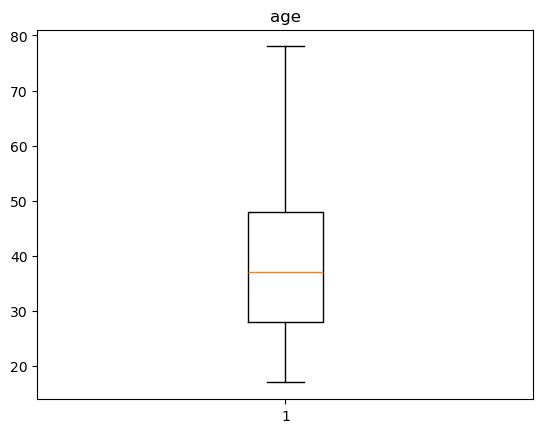

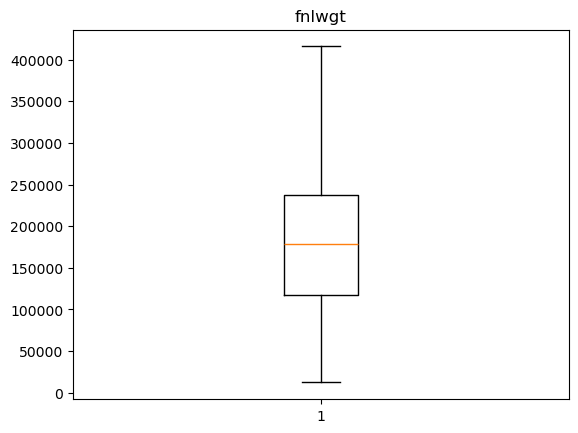

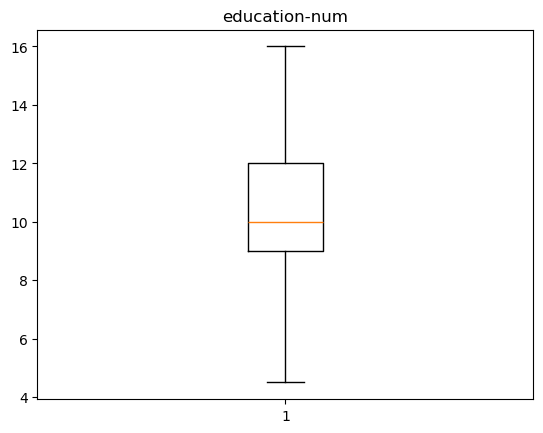

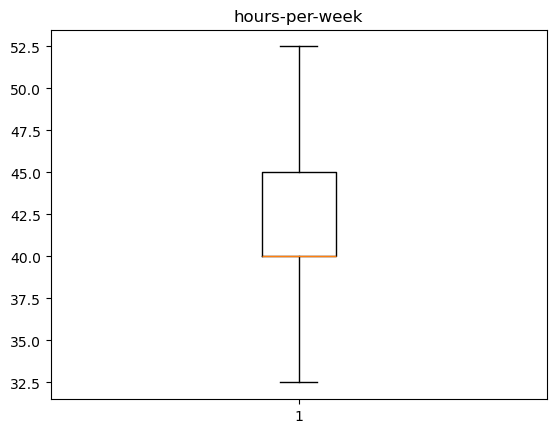

In [50]:
for i in l1:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

# Visualization charts :-

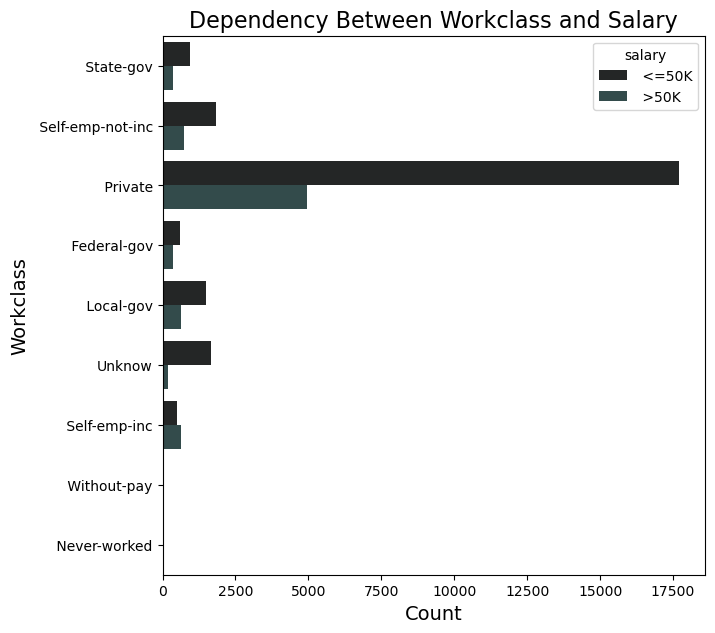

In [52]:
# higest salary depend on workclass
palette = sns.color_palette("dark:#2f4f4f", 2)  # 2 colors with dark shades for the 'salary' hue categories
fig = plt.figure(figsize=(7,7))
sns.countplot(data=df, y='workclass', hue='salary', orient='h', palette=palette)
plt.title("Dependency Between Workclass and Salary", fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Workclass', fontsize=14)
plt.show()

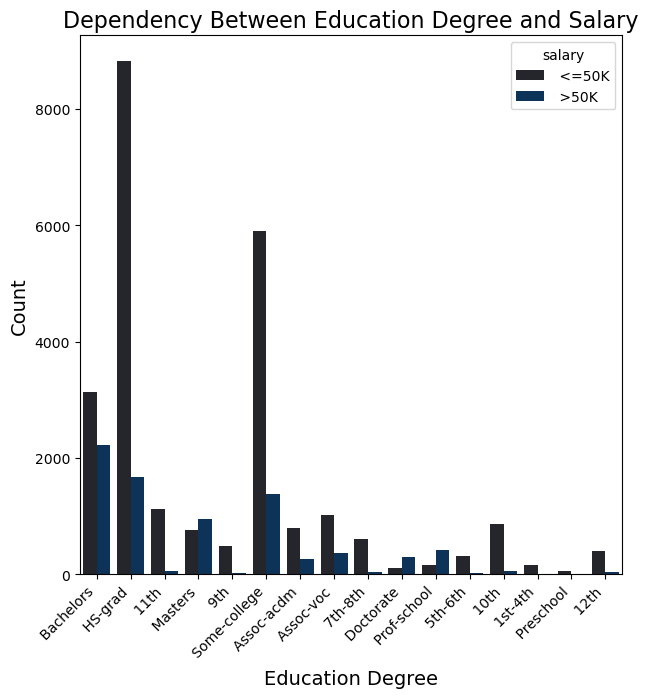

In [53]:
# relation betwwen the education-degree and salary
palette = sns.color_palette("dark:#003366", 2)
fig = plt.figure(figsize=(7,7))
g = sns.countplot(data=df, x='education', hue='salary', palette=palette)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
plt.title("Dependency Between Education Degree and Salary", fontsize=16)
plt.xlabel('Education Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

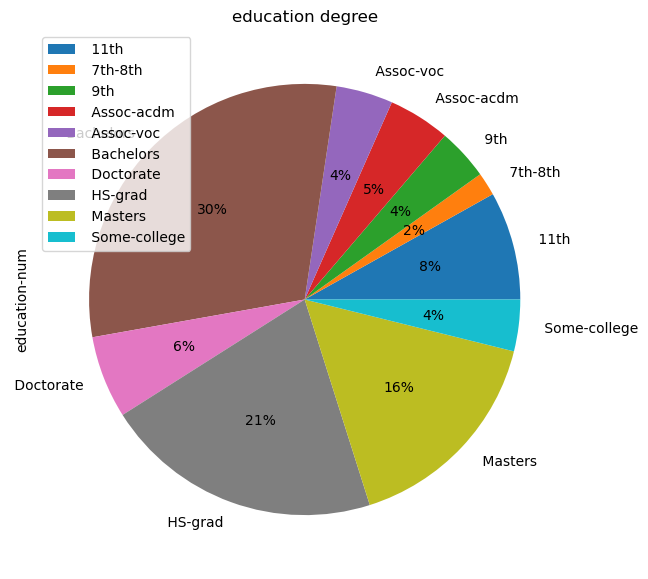

In [54]:
# largest type of education degree
y = df.head(25)
y.groupby(['education']).sum().plot(kind='pie', y='education-num' , autopct='%1.0f%%',figsize=(7,7))
plt.title("education degree")
plt.show()


In [55]:
q1=df_obj.columns
q1

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [56]:
for i in q1:
    print(df_obj[i].value_counts())
    print("*"*60)

workclass
 Private             22671
 Self-emp-not-inc     2540
 Local-gov            2093
Unknow                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
************************************************************
education
HS-grad         10493
Some-college     7281
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
************************************************************
marital-status
Married-civ-spouse       14969
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF

# LabelEncoder :-

In [58]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()

In [59]:
df_obj['sex']=a.fit_transform(df_obj['sex'])
df_obj['salary']=a.fit_transform(df_obj['salary'])

In [60]:
df_obj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,United-States,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,United-States,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,United-States,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,United-States,0


In [61]:
q1=df_obj.columns
q1

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

# get_dummies :-

In [63]:
df_obj=pd.get_dummies(df_obj,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country']).astype(int)

In [64]:
df_obj

,sex,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
df_num=df.select_dtypes(exclude=object)
df_num

,age,fnlwgt,education-num,hours-per-week
0,39,77516.0,13.0,40.0
1,50,83311.0,13.0,32.5
2,38,215646.0,9.0,40.0
3,53,234721.0,7.0,40.0
4,28,338409.0,13.0,40.0
...,...,...,...,...
32556,27,257302.0,12.0,38.0
32557,40,154374.0,9.0,40.0
32558,58,151910.0,9.0,40.0
32559,22,201490.0,9.0,32.5


In [66]:
from sklearn.preprocessing import MinMaxScaler
q=MinMaxScaler()

In [67]:
w=df_num.columns
w

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week'], dtype='object')

In [68]:
for i in w:
    df_num[i]=q.fit_transform(df_num[[i]])

In [69]:
df_num

,age,fnlwgt,education-num,hours-per-week
0,0.360656,0.161676,0.739130,0.375
1,0.540984,0.176039,0.739130,0.000
2,0.344262,0.504034,0.391304,0.375
3,0.590164,0.551312,0.217391,0.375
4,0.180328,0.808305,0.739130,0.375
...,...,...,...,...
32556,0.163934,0.607280,0.652174,0.275
32557,0.377049,0.352171,0.391304,0.375
32558,0.672131,0.346063,0.391304,0.375
32559,0.081967,0.468948,0.391304,0.000


<Axes: xlabel='salary', ylabel='count'>

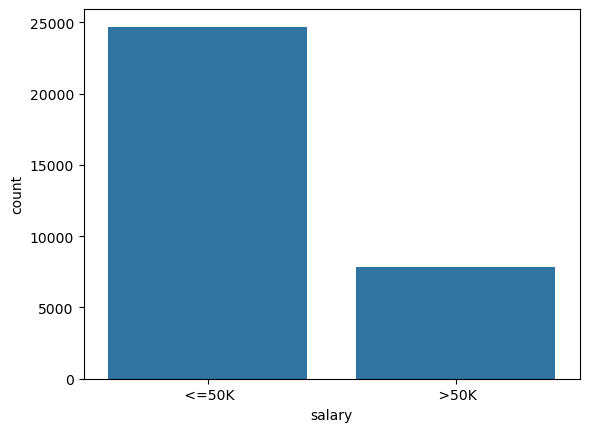

In [70]:
sns.countplot(x=df["salary"])

In [71]:
from scipy.stats import skew

In [72]:
w

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week'], dtype='object')

In [73]:
for i in w:
    print(i,skew(df_num[i]))
    print("*"*60)

age 0.5133500830238814
************************************************************
fnlwgt 0.5481264454945776
************************************************************
education-num -0.03357155968349848
************************************************************
hours-per-week 0.4381569725397826
************************************************************


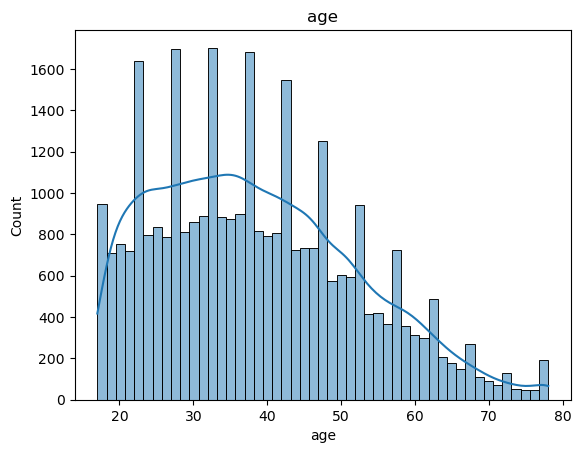

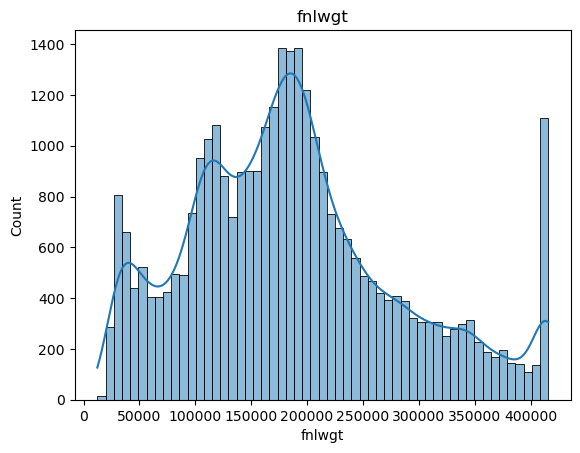

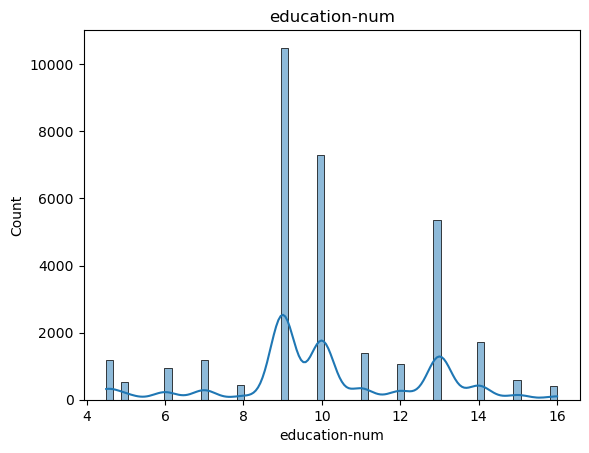

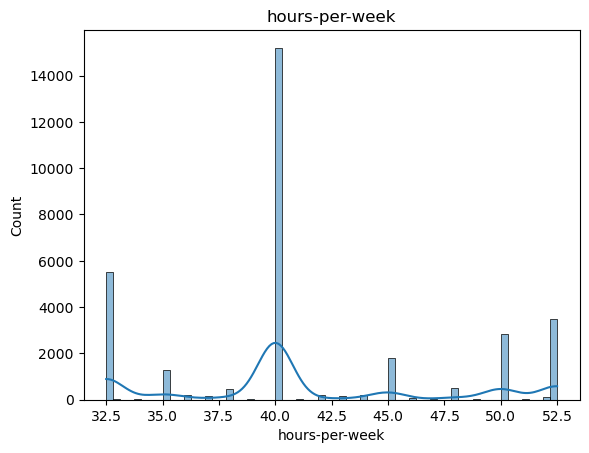

In [74]:
for i in w:
    sns.histplot(df[i], kde=True)  
    plt.title(i)
    plt.show()  

In [75]:
new_df=pd.concat([df_obj,df_num],axis=1)
new_df

,sex,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0.360656,0.161676,0.739130,0.375
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.540984,0.176039,0.739130,0.000
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.504034,0.391304,0.375
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.590164,0.551312,0.217391,0.375
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.180328,0.808305,0.739130,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.163934,0.607280,0.652174,0.275
32557,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.377049,0.352171,0.391304,0.375
32558,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.672131,0.346063,0.391304,0.375
32559,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.081967,0.468948,0.391304,0.000


In [76]:
x = new_df.drop("salary", axis=1)
y = new_df["salary"]

In [77]:
x["salary"]=new_df["salary"]
x

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week,salary
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0.360656,0.161676,0.739130,0.375,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.540984,0.176039,0.739130,0.000,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.344262,0.504034,0.391304,0.375,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.590164,0.551312,0.217391,0.375,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.180328,0.808305,0.739130,0.375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.163934,0.607280,0.652174,0.275,0
32557,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.377049,0.352171,0.391304,0.375,1
32558,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.672131,0.346063,0.391304,0.375,0
32559,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.081967,0.468948,0.391304,0.000,0


In [78]:
x.corr().tail(1)

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week,salary
salary,0.215967,0.059332,0.033018,-0.008265,-0.078397,0.139441,0.030007,0.014784,-0.01169,-0.078292,...,-0.007669,0.034218,-0.017666,0.006953,0.00313,0.235804,-0.008425,0.342356,0.271041,1.0


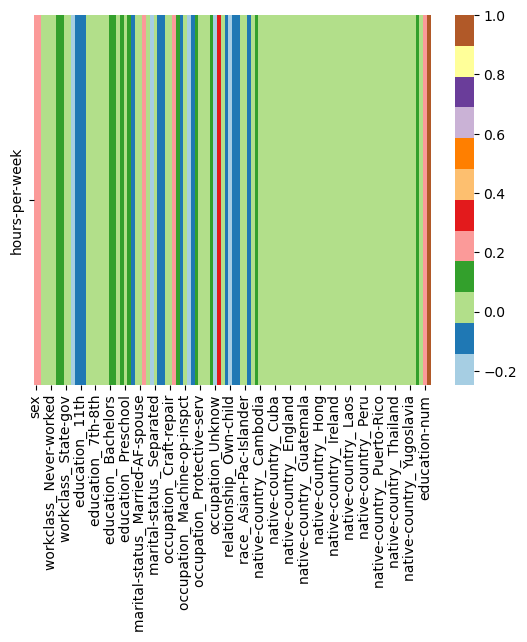

In [79]:
sns.heatmap(new_df.corr().tail(1),cmap="Paired")
plt.show()

In [80]:
X=x.drop(columns=['salary'])

In [81]:
X

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.360656,0.161676,0.739130,0.375
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.540984,0.176039,0.739130,0.000
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.504034,0.391304,0.375
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.590164,0.551312,0.217391,0.375
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.180328,0.808305,0.739130,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.163934,0.607280,0.652174,0.275
32557,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.377049,0.352171,0.391304,0.375
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.672131,0.346063,0.391304,0.375
32559,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.081967,0.468948,0.391304,0.000


In [82]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32535, dtype: int32

In [83]:
# Random Oversampler
from imblearn.over_sampling import RandomOverSampler

In [84]:
# instance

random_over = RandomOverSampler()

x_sample, y_sample = random_over.fit_resample(X,y)
y_sample.value_counts()

salary
0    24696
1    24696
Name: count, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

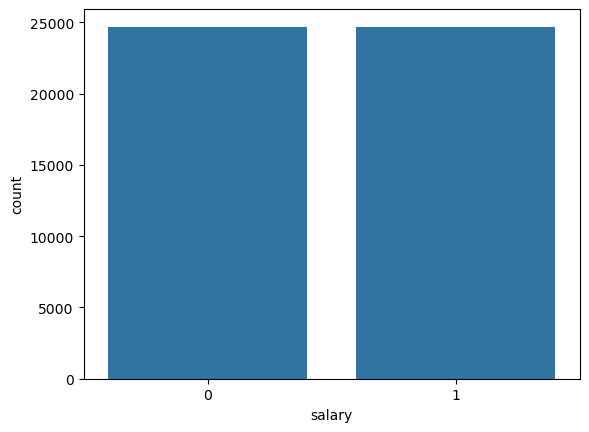

In [85]:
sns.countplot(x=y_sample)

In [86]:
x_sample

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.360656,0.161676,0.739130,0.375
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.540984,0.176039,0.739130,0.000
2,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.504034,0.391304,0.375
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.590164,0.551312,0.217391,0.375
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.180328,0.808305,0.739130,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49387,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.508197,0.682490,1.000000,1.000
49388,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.163934,0.412656,0.739130,1.000
49389,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.295082,1.000000,0.391304,0.375
49390,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.163934,0.537685,0.478261,0.375


In [87]:
y_sample

0        0
1        0
2        0
3        0
4        0
        ..
49387    1
49388    1
49389    1
49390    1
49391    1
Name: salary, Length: 49392, dtype: int32

### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.10, random_state=42)

In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [91]:
x_train

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week
6750,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.393443,0.630151,0.391304,0.625
21907,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.081967,0.029056,0.478261,1.000
16269,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.459016,0.372574,0.391304,0.125
45012,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0.672131,0.352575,0.391304,0.000
27963,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.803279,0.404675,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0.114754,0.581932,0.391304,0.000
44732,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.051345,0.739130,1.000
38158,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.229508,1.000000,0.739130,0.375
860,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.016393,0.505616,0.217391,0.000


In [92]:
x_test

,sex,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknow,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United-States,age,fnlwgt,education-num,hours-per-week
31265,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.262295,0.592951,0.739130,0.875
26674,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.081967,0.541356,0.652174,0.000
48410,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.524590,0.452603,0.478261,0.375
11165,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.243956,0.652174,0.875
32947,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.426230,0.255022,0.565217,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28697,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.409836,0.281852,0.391304,0.375
35601,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.180328,0.986280,0.217391,1.000
36714,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.344262,0.131602,0.478261,0.375
3022,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.557377,0.029494,0.739130,0.375


# Model Development

# 1. Logistic Regression Model :-

In [95]:
from sklearn.linear_model import LogisticRegression

### Model Training

In [97]:
logistic_model =LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [99]:
# Traning accuracy
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Classification Report:\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:",accuracy)
print("*"*60)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report:\n",clf_report)

Classification Report:
 [[17285  4979]
 [ 3434 18754]]
************************************************************
Accuracy: 0.8107396742553766
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80     22264
           1       0.79      0.85      0.82     22188

    accuracy                           0.81     44452
   macro avg       0.81      0.81      0.81     44452
weighted avg       0.81      0.81      0.81     44452



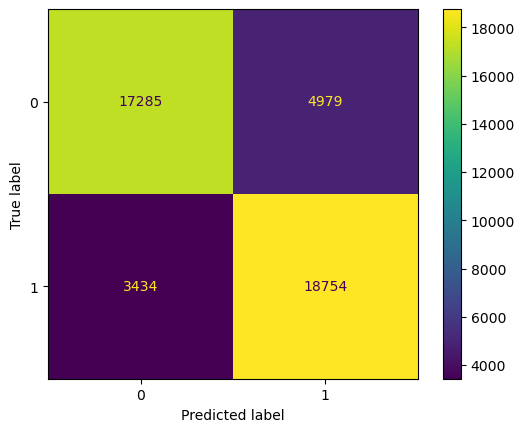

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logistic_model, x_train, y_train)

In [101]:
# Testing accuracy

y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Classification Report:\n",cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classification Report:\n",clf_report)

Classification Report:
 [[1888  544]
 [ 396 2112]]
************************************************************
Accuracy: 0.8097165991902834
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      2432
           1       0.80      0.84      0.82      2508

    accuracy                           0.81      4940
   macro avg       0.81      0.81      0.81      4940
weighted avg       0.81      0.81      0.81      4940



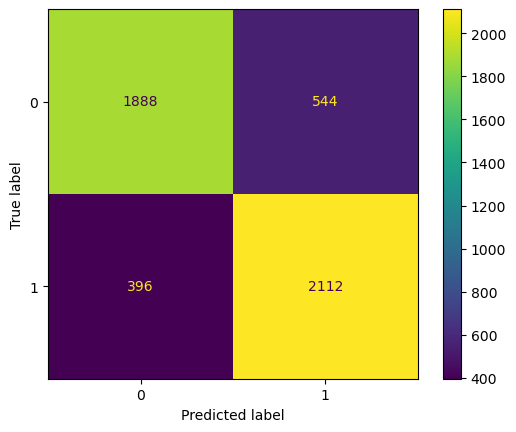

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logistic_model, x_test, y_test)

In [103]:
logistic_model.score(x_train,y_train)

0.8107396742553766

In [104]:
logistic_model.score(x_test,y_test)

0.8097165991902834

### AUC ROC Curve :-

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [107]:
y_pred_prob =logistic_model.predict_proba(x_train)   # Plot AUC- ROC curve on Training data
y_pred_prob[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

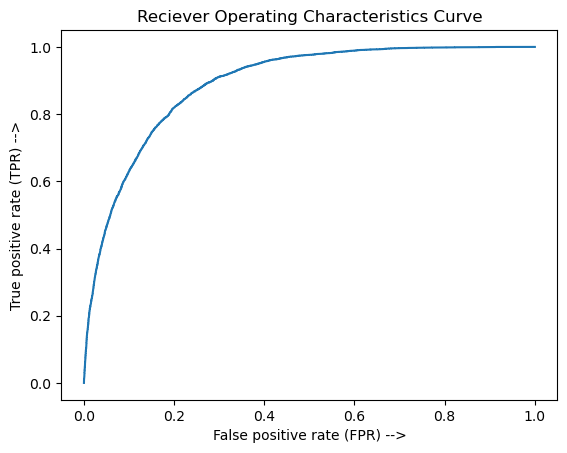

In [108]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [109]:
auc_value = auc(fpr, tpr)
auc_value

0.8905135319639099

# 2. Decision Tree Base Model :-

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

### Model Training

In [113]:
dt_clf = DecisionTreeClassifier(random_state=52)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=52)

### Model Evaluation

In [115]:
# Training Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[22262     0]
 [    2 22188]]
************************************************************
Accuracy :  0.9999550076486997
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22262
           1       1.00      1.00      1.00     22190

    accuracy                           1.00     44452
   macro avg       1.00      1.00      1.00     44452
weighted avg       1.00      1.00      1.00     44452



In [116]:
# Testing Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2041   64]
 [ 391 2444]]
************************************************************
Accuracy :  0.9078947368421053
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2105
           1       0.97      0.86      0.91      2835

    accuracy                           0.91      4940
   macro avg       0.91      0.92      0.91      4940
weighted avg       0.92      0.91      0.91      4940



In [117]:
dt_clf.score(x_train, y_train)

0.9999550076486997

In [118]:
dt_clf.score(x_test, y_test)

0.9078947368421053

### 2.1 Pre-Prunning 

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier



dt_model = DecisionTreeClassifier(random_state=11)


hyperparameter = {
    "criterion": ['gini', 'entropy'],
    "max_depth": np.arange(3, 8),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": np.arange(2, 15)
}

rscv_dt_clf = RandomizedSearchCV(estimator=dt_model, param_distributions=hyperparameter, n_iter=100, cv=5, random_state=11)


rscv_dt_clf.fit(x_train, y_train)

print("Best Hyperparameters: ", rscv_dt_clf.best_params_)


Best Hyperparameters:  {'min_samples_split': 18, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}


In [121]:
# Training Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[22262     0]
 [    2 22188]]
************************************************************
Accuracy :  0.9999550076486997
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22262
           1       1.00      1.00      1.00     22190

    accuracy                           1.00     44452
   macro avg       1.00      1.00      1.00     44452
weighted avg       1.00      1.00      1.00     44452



In [122]:
# Testing Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2041   64]
 [ 391 2444]]
************************************************************
Accuracy :  0.9078947368421053
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2105
           1       0.97      0.86      0.91      2835

    accuracy                           0.91      4940
   macro avg       0.91      0.92      0.91      4940
weighted avg       0.92      0.91      0.91      4940



In [123]:
rscv_dt_clf.score(x_train,y_train)

0.8164312066948619

In [124]:
rscv_dt_clf.score(x_test,y_test)

0.8054655870445344

### 2.2 Post - Purunning

In [126]:
# dt_clf = DecisionTreeClassifier(random_state=11)

# dt_clf.fit(x_train, y_train)

In [127]:
# result = dt_clf.cost_complexity_pruning_path(x_train, y_train)
# ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [128]:
# train_accuracy_list = []
# test_accuracy_list = []

# for i in ccp_alpha_list:
#     dt_clf = DecisionTreeClassifier(ccp_alpha=i, random_state=11)
#     dt_clf.fit(x_train, y_train)
    
#     # Training accuracy
#     training_accuracy = dt_clf.score(x_train, y_train)
#     train_accuracy_list.append(training_accuracy)
    
#     # Testing accuracy
#     testing_accuracy = dt_clf.score(x_test, y_test)
#     test_accuracy_list.append(testing_accuracy)

In [129]:
# fig, ax = plt.subplots()
# ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
# ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
# ax.legend()

In [130]:
# max_test = test_accuracy_list.index(max(test_accuracy_list))
# max_test

In [131]:
# best_ccp = ccp_alpha_list[max_test]
# best_ccp

In [132]:
# dt_clf = DecisionTreeClassifier(ccp_alpha= best_ccp,random_state=11)

# dt_clf.fit(x_train, y_train)

In [133]:
# # Training Accuracy
# y_pred_train = decision_tree_model.predict(x_train)

# cnf_matrix = confusion_matrix(y_pred_train, y_train)
# print("Confusion Matrix: \n", cnf_matrix)
# print("*"*60)

# accuracy = accuracy_score(y_pred_train, y_train)
# print("Accuracy : ",accuracy)
# print("*"*60)

# clf_report  = classification_report(y_pred_train, y_train)
# print("Classification report :\n",clf_report)

In [134]:
# # Testing Accuracy
# y_pred = decision_tree_model.predict(x_test)

# cnf_matrix = confusion_matrix(y_pred, y_test)
# print("Confusion Matrix: \n", cnf_matrix)
# print("*"*60)

# accuracy = accuracy_score(y_pred, y_test)
# print("Accuracy : ",accuracy)
# print("*"*60)

# clf_report  = classification_report(y_pred, y_test)
# print("Classification report :\n",clf_report)

# 3.Random Forest Base Model :-

In [136]:
from sklearn.ensemble import RandomForestClassifier

### Model Training

In [138]:
# Create an instance
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

### Model Evaluation

In [140]:
# Training Accuracy
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[22262     2]
 [    0 22188]]
*********************************************
Accuracy:  0.9999550076486997
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22264
           1       1.00      1.00      1.00     22188

    accuracy                           1.00     44452
   macro avg       1.00      1.00      1.00     44452
weighted avg       1.00      1.00      1.00     44452



In [141]:
# testing Accuracy
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[2091  341]
 [  44 2464]]
*********************************************
Accuracy:  0.9220647773279352
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      2432
           1       0.88      0.98      0.93      2508

    accuracy                           0.92      4940
   macro avg       0.93      0.92      0.92      4940
weighted avg       0.93      0.92      0.92      4940



In [142]:
rf_clf.score(x_train, y_train)

0.9999550076486997

In [143]:
rf_clf.score(x_test, y_test)

0.9220647773279352

### 3.1 Hyperparameter Tunning for Random Forest

In [145]:
rf_model = RandomForestClassifier()

n_estimators=100, # Number of DT
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
bootstrap=True,  # Can we avoid bootstrapping...?
oob_score=False,
n_jobs=-1,
random_state=None,
ccp_alpha=0.0

In [146]:
ccp_alpha_list = list(np.random.random(10))
ccp_alpha_list

[0.08569618811626822,
 0.9972540462548775,
 0.8340426522809622,
 0.7164887111195845,
 0.8549820235678522,
 0.3344018856868628,
 0.38735581476192793,
 0.6474168422460604,
 0.5940304342113712,
 0.3998687664851741]

In [147]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True],
                "ccp_alpha" : ccp_alpha_list
            }

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(ccp_alpha=0.8549820235678522, max_depth=4,
                       min_samples_leaf=3, min_samples_split=9, n_estimators=28,
                       oob_score=True, random_state=10)

In [148]:
rf_clf = gscv_rf_model.best_estimator_
rf_clf.fit(x_train, y_train)

# testing Accuracy
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[2432    0]
 [2508    0]]
*********************************************
Accuracy:  0.49230769230769234
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66      2432
           1       0.00      0.00      0.00      2508

    accuracy                           0.49      4940
   macro avg       0.25      0.50      0.33      4940
weighted avg       0.24      0.49      0.32      4940



In [149]:
# Training Accuracy
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[22264     0]
 [22188     0]]
*********************************************
Accuracy:  0.5008548546747053
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     22264
           1       0.00      0.00      0.00     22188

    accuracy                           0.50     44452
   macro avg       0.25      0.50      0.33     44452
weighted avg       0.25      0.50      0.33     44452



In [150]:
gscv_rf_model.score(x_train,y_train)

0.5008548546747053

In [151]:
gscv_rf_model.score(x_test,y_test)

0.49230769230769234

# 4. AdaboostClassifier :-

In [153]:
from sklearn.ensemble import AdaBoostClassifier

In [154]:
adb = AdaBoostClassifier(random_state=11)

In [155]:
adb.fit(x_train,y_train)

AdaBoostClassifier(random_state=11)

In [156]:
y_pred=adb.predict(x_test)

In [157]:
adb.score(x_test,y_test)

0.8123481781376518

In [158]:
adb.score(x_train,y_train)

0.8139116350220462

# 5.Gradient Boosting Classifier :-

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
GBR = GradientBoostingClassifier(random_state=11)

In [162]:
GBR.fit(x_train,y_train)

GradientBoostingClassifier(random_state=11)

In [163]:
y_pred=GBR.predict(x_test)

In [164]:
GBR.score(x_test,y_test)

0.8153846153846154

In [165]:
GBR.score(x_train,y_train)

0.8223252047151984

# 6. XG_Boost :-

In [167]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [168]:
xgb = XGBClassifier(max_depth=5, learning_rate=0.1, objective='binary:logistic', random_state=11)

In [169]:
# Fit the model on the training data
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=11, ...)

In [170]:
# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [171]:
# Evaluation metrics for the Test set
print("*"*45)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: ",accuracy)
print("*"*45)

# Evaluation metrics for the Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost (Test set):')
print(score)


*********************************************
Accuracy:  0.8248987854251012
*********************************************
Classification Report for XGBoost (Test set):
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2432
           1       0.80      0.87      0.83      2508

    accuracy                           0.82      4940
   macro avg       0.83      0.82      0.82      4940
weighted avg       0.83      0.82      0.82      4940



In [172]:
# Evaluation metrics for the Train set

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*45)

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost (Test set):')
print(score)

*********************************************
Accuracy:  0.8350580401331774
*********************************************
Classification Report for XGBoost (Test set):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     22264
           1       0.81      0.88      0.84     22188

    accuracy                           0.84     44452
   macro avg       0.84      0.84      0.83     44452
weighted avg       0.84      0.84      0.83     44452



In [173]:
xgb.score(x_train,y_train)

0.8350580401331774

In [174]:
xgb.score(x_test,y_test)

0.8248987854251012

### 6.1 XG_Boost RandomizedSearchCV

In [176]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=11, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters for RandomizedSearchCV
hyperparameter = {
    "n_estimators": np.arange(50, 300, 50),  
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3], 
    "max_depth": np.arange(3, 10),  
    "min_child_weight": np.arange(1, 10),  
    "subsample": [0.6, 0.8, 1.0],  
    "colsample_bytree": [0.6, 0.8, 1.0],  
    "gamma": [0, 0.1, 0.2, 0.5],  
}

# Initialize RandomizedSearchCV with the XGBClassifier and hyperparameters
rscv_xgb_clf = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=hyperparameter, 
    n_iter=100, 
    cv=5, 
    random_state=11, 
    scoring='accuracy', 
    n_jobs=-1
)

In [177]:
rscv_xgb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=11, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=11, scoring='accuracy')

In [178]:
xgb = rscv_xgb_clf.best_estimator_

In [179]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=11, ...)

In [180]:
# Testing Accuracy
y_pred = xgb.predict(x_test)

cnf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test):\n", cnf_matrix_test)
print("*" * 45)

accuracy_test = accuracy_score(y_test, y_pred)
print("Testing Accuracy: ", accuracy_test)
print("*" * 45)

clf_report_test = classification_report(y_test, y_pred)
print("Classification Report (Test):\n", clf_report_test)


Confusion Matrix (Test):
 [[2020  412]
 [ 126 2382]]
*********************************************
Testing Accuracy:  0.8910931174089068
*********************************************
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      2432
           1       0.85      0.95      0.90      2508

    accuracy                           0.89      4940
   macro avg       0.90      0.89      0.89      4940
weighted avg       0.90      0.89      0.89      4940



In [181]:
# Training Accuracy
y_pred_train = xgb.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Train):\n", cnf_matrix_train)
print("*" * 45)

accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", accuracy_train)
print("*" * 45)

clf_report_train = classification_report(y_train, y_pred_train)
print("Classification Report (Train):\n", clf_report_train)


Confusion Matrix (Train):
 [[20231  2033]
 [  395 21793]]
*********************************************
Training Accuracy:  0.9453792855214613
*********************************************
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     22264
           1       0.91      0.98      0.95     22188

    accuracy                           0.95     44452
   macro avg       0.95      0.95      0.95     44452
weighted avg       0.95      0.95      0.95     44452



In [182]:
rscv_xgb_clf.score(x_train,y_train)

0.9453792855214613

In [183]:
rscv_xgb_clf.score(x_test,y_test)

0.8910931174089068

# Summary of all Module

In [185]:
model_results = []

model_results.append({
    'Model': 'Logistic Regression Model',
    'Training Accuracy': logistic_model.score(x_train,y_train),
    'Testing Accuracy': logistic_model.score(x_test,y_test)   
})

# model_results.append({
#     'Model': 'AUC ROC Curve',
#     'Training Accuracy':  logistic_model.predict_proba(x_train)
#      })


model_results.append({
    'Model': 'Decision tree',
    'Training Accuracy':  dt_clf.score(x_train,y_train),
    'Testing Accuracy': dt_clf.score(x_test,y_test)
})

model_results.append({
    'Model': 'Decision tree Pre prunning',
    'Training Accuracy': rscv_dt_clf.score(x_train,y_train) ,
    'Testing Accuracy': rscv_dt_clf.score(x_test,y_test)
})


model_results.append({
    'Model': 'Random Forest',
    'Training Accuracy': rf_clf.score(x_train, y_train),
    'Testing Accuracy': rf_clf.score(x_test,y_test)
})

model_results.append({
    'Model': 'Random Forest Hyperparameter Tunning ',
    'Training Accuracy': gscv_rf_model.score(x_train,y_train),
    'Testing Accuracy': gscv_rf_model.score(x_test,y_test)

})

model_results.append({
    'Model': 'Adaboost',
    'Training Accuracy': adb.score(x_train,y_train),
    'Testing Accuracy': adb.score(x_test,y_test)
})

model_results.append({
    'Model': 'Gradient Boosting',
    'Training Accuracy': GBR.score(x_train,y_train),
    'Testing Accuracy': GBR.score(x_test,y_test)

})

model_results.append({
    'Model': 'XG_Boost',
    'Training Accuracy': xgb.score(x_train,y_train),
    'Testing Accuracy': xgb.score(x_test,y_test)
})

model_results.append({
    'Model': 'XG Boost Randomized Search CV',
    'Training Accuracy': rscv_xgb_clf.score(x_train,y_train),
    'Testing Accuracy': rscv_xgb_clf.score(x_test,y_test)
})
summary_df = pd.DataFrame(model_results)

summary_df


,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression Model,0.810740,0.809717
1,Decision tree,0.999955,0.907895
2,Decision tree Pre prunning,0.816431,0.805466
3,Random Forest,0.500855,0.492308
4,Random Forest Hyperparameter Tunning,0.500855,0.492308
5,Adaboost,0.813912,0.812348
6,Gradient Boosting,0.822325,0.815385
7,XG_Boost,0.945379,0.891093
8,XG Boost Randomized Search CV,0.945379,0.891093
